In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('Data_clean.csv')
print(data.columns)

Index(['accident_index', 'speed_limit', 'urban_or_rural_area',
       'local_authority_name', 'accident_count', 'traffic_flow',
       'accident_rate', 'population_density', 'mean_income_of_tax_payers',
       'total_road_length', 'Inland_Area', 'Road_Network_Density',
       'Signal_Count', 'Driving_Distance'],
      dtype='object')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22883 entries, 0 to 22882
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accident_index             22883 non-null  float64
 1   speed_limit                22883 non-null  int64  
 2   urban_or_rural_area        22883 non-null  int64  
 3   local_authority_name       22883 non-null  object 
 4   accident_count             22883 non-null  int64  
 5   traffic_flow               22883 non-null  int64  
 6   accident_rate              22883 non-null  float64
 7   population_density         22883 non-null  float64
 8   mean_income_of_tax_payers  22236 non-null  float64
 9   total_road_length          22883 non-null  float64
 10  Inland_Area                22883 non-null  float64
 11  Road_Network_Density       22883 non-null  float64
 12  Signal_Count               22711 non-null  float64
 13  Driving_Distance           22883 non-null  int

In [4]:

vehicle_data = pd.read_csv('car.csv')  # 包含车辆数据的表

# 合并两个表
merged_data = pd.merge(data, vehicle_data[['local_authority_name', 'PLG_Total']], on='local_authority_name', how='left')

# 检查结果
print(merged_data.head())

# 保存到新的 CSV 文件
merged_data.to_csv('Data_clean_with_PLG_Total.csv', index=False)

   accident_index  speed_limit  urban_or_rural_area  local_authority_name  \
0    2.020000e+12           30                    1  Barking and Dagenham   
1    2.020000e+12           30                    1  Barking and Dagenham   
2    2.020000e+12           40                    1  Barking and Dagenham   
3    2.020000e+12           30                    1  Barking and Dagenham   
4    2.020000e+12           30                    1  Barking and Dagenham   

   accident_count  traffic_flow  accident_rate  population_density  \
0             442        332152       0.001331              6286.4   
1             442        332152       0.001331              6286.4   
2             442        332152       0.001331              6286.4   
3             442        332152       0.001331              6286.4   
4             442        332152       0.001331              6286.4   

   mean_income_of_tax_payers  total_road_length  Inland_Area  \
0                    31800.0              212.9     

In [5]:
# 删除不需要的列
columns_to_drop = ['accident_index', 'speed_limit', 'urban_or_rural_area', 'total_road_length', 'Inland_Area']
df_cleaned = merged_data.drop(columns=columns_to_drop)

# 按 'local_authority_name' 去除重复行，保留每个区域的唯一记录
df_unique = df_cleaned.drop_duplicates(subset='local_authority_name')

# 查看结果
print(df_unique.head())

      local_authority_name  accident_count  traffic_flow  accident_rate  \
0     Barking and Dagenham             442        332152       0.001331   
442                 Barnet             829       1421345       0.000583   
1271                Bexley             395        817061       0.000483   
1666                 Brent             934        701496       0.001331   
2600               Bromley             598        631376       0.000947   

      population_density  mean_income_of_tax_payers  Road_Network_Density  \
0                 6286.4                    31800.0              5.896200   
442               4821.9                    59100.0              5.486005   
1271              4295.6                    38000.0              5.645334   
1666              8112.3                    44100.0              6.668517   
2600              2299.4                    54500.0              3.781264   

      Signal_Count  Driving_Distance  PLG_Total  
0            454.0               634

In [6]:
print(df_unique['local_authority_name'])

0          Barking and Dagenham
442                      Barnet
1271                     Bexley
1666                      Brent
2600                    Bromley
3198                     Camden
3924             City of London
4096                    Croydon
5198                     Ealing
6070                    Enfield
7044                  Greenwich
7644                    Hackney
8413     Hammersmith and Fulham
8992                   Haringey
9962                     Harrow
10371                  Havering
10867                Hillingdon
11517                  Hounslow
12184                 Islington
12765    Kensington and Chelsea
13407      Kingston upon Thames
13682                   Lambeth
14734                  Lewisham
15496                    Merton
15929                    Newham
16743                 Redbridge
17374      Richmond upon Thames
17746                 Southwark
18761                    Sutton
19115             Tower Hamlets
20106            Waltham Forest
20610   

In [7]:
# 使用 .loc 进行操作
df_unique.loc[:, 'accident_rate_percentage'] = df_unique['accident_rate'] * 100

/tmp/ipykernel_751/2418590600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.loc[:, 'accident_rate_percentage'] = df_unique['accident_rate'] * 100


In [8]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 21653
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   local_authority_name       33 non-null     object 
 1   accident_count             33 non-null     int64  
 2   traffic_flow               33 non-null     int64  
 3   accident_rate              33 non-null     float64
 4   population_density         33 non-null     float64
 5   mean_income_of_tax_payers  31 non-null     float64
 6   Road_Network_Density       33 non-null     float64
 7   Signal_Count               32 non-null     float64
 8   Driving_Distance           33 non-null     int64  
 9   PLG_Total                  33 non-null     float64
 10  accident_rate_percentage   33 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 3.1+ KB


In [9]:
print(df_unique.columns)

Index(['local_authority_name', 'accident_count', 'traffic_flow',
       'accident_rate', 'population_density', 'mean_income_of_tax_payers',
       'Road_Network_Density', 'Signal_Count', 'Driving_Distance', 'PLG_Total',
       'accident_rate_percentage'],
      dtype='object')


In [10]:
# 更新区域映射字典
region_mapping = {
    "Camden": "Central",
    "City of London": "Central",
    "Islington": "Central",
    "Kensington and Chelsea": "Central",
    "Lambeth": "Central",
    "Southwark": "Central",
    "Westminster": "Central",
    "Barking and Dagenham": "East",
    "Bexley": "East",
    "Greenwich": "East",
    "Hackney": "East",
    "Havering": "East",
    "Lewisham": "East",
    "Newham": "East",
    "Redbridge": "East",
    "Tower Hamlets": "East",
    "Waltham Forest": "East",
    "Bromley": "South",
    "Croydon": "South",
    "Kingston upon Thames": "South",
    "Merton": "South",
    "Richmond upon Thames": "South",
    "Sutton": "South",
    "Wandsworth": "South",
    "Brent": "West",
    "Ealing": "West",
    "Hammersmith and Fulham": "West",
    "Hillingdon": "West",
    "Harrow": "West",
    "Hounslow": "West",
    "Barnet": "North",
    "Enfield": "North",
    "Haringey": "North",
}

# 为 `local_authority_name` 添加区域列
# 使用 .loc 明确指定列
df_unique.loc[:, 'region'] = data['local_authority_name'].map(region_mapping)


# 检查映射后的数据
print(df_unique[['local_authority_name', 'region']])

         local_authority_name   region
0        Barking and Dagenham     East
442                    Barnet    North
1271                   Bexley     East
1666                    Brent     West
2600                  Bromley    South
3198                   Camden  Central
3924           City of London  Central
4096                  Croydon    South
5198                   Ealing     West
6070                  Enfield    North
7044                Greenwich     East
7644                  Hackney     East
8413   Hammersmith and Fulham     West
8992                 Haringey    North
9962                   Harrow     West
10371                Havering     East
10867              Hillingdon     West
11517                Hounslow     West
12184               Islington  Central
12765  Kensington and Chelsea  Central
13407    Kingston upon Thames    South
13682                 Lambeth  Central
14734                Lewisham     East
15496                  Merton    South
15929                  Ne

/tmp/ipykernel_751/37585765.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.loc[:, 'region'] = data['local_authority_name'].map(region_mapping)


In [11]:
df_unique['region'] = df_unique['local_authority_name'].map(region_mapping)

# 解码为东南西北分类
df_unique['East'] = (df_unique['region'] == 'East').astype(int)
df_unique['South'] = (df_unique['region'] == 'South').astype(int)
df_unique['West'] = (df_unique['region'] == 'West').astype(int)
df_unique['North'] = (df_unique['region'] == 'North').astype(int)

# 查看结果
print(df_unique[['local_authority_name', 'region', 'East', 'South', 'West', 'North']])

         local_authority_name   region  East  South  West  North
0        Barking and Dagenham     East     1      0     0      0
442                    Barnet    North     0      0     0      1
1271                   Bexley     East     1      0     0      0
1666                    Brent     West     0      0     1      0
2600                  Bromley    South     0      1     0      0
3198                   Camden  Central     0      0     0      0
3924           City of London  Central     0      0     0      0
4096                  Croydon    South     0      1     0      0
5198                   Ealing     West     0      0     1      0
6070                  Enfield    North     0      0     0      1
7044                Greenwich     East     1      0     0      0
7644                  Hackney     East     1      0     0      0
8413   Hammersmith and Fulham     West     0      0     1      0
8992                 Haringey    North     0      0     0      1
9962                   Ha

/tmp/ipykernel_751/501390340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['region'] = df_unique['local_authority_name'].map(region_mapping)
/tmp/ipykernel_751/501390340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['East'] = (df_unique['region'] == 'East').astype(int)
/tmp/ipykernel_751/501390340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [12]:
df_unique = df_unique.drop(columns = ['local_authority_name','accident_rate','accident_count','region', 'traffic_flow'])

In [13]:
df_unique = df_unique.dropna()

In [14]:
print(df_unique.columns)

Index(['population_density', 'mean_income_of_tax_payers',
       'Road_Network_Density', 'Signal_Count', 'Driving_Distance', 'PLG_Total',
       'accident_rate_percentage', 'East', 'South', 'West', 'North'],
      dtype='object')


In [15]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 21653
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   population_density         30 non-null     float64
 1   mean_income_of_tax_payers  30 non-null     float64
 2   Road_Network_Density       30 non-null     float64
 3   Signal_Count               30 non-null     float64
 4   Driving_Distance           30 non-null     int64  
 5   PLG_Total                  30 non-null     float64
 6   accident_rate_percentage   30 non-null     float64
 7   East                       30 non-null     int64  
 8   South                      30 non-null     int64  
 9   West                       30 non-null     int64  
 10  North                      30 non-null     int64  
dtypes: float64(6), int64(5)
memory usage: 2.8 KB


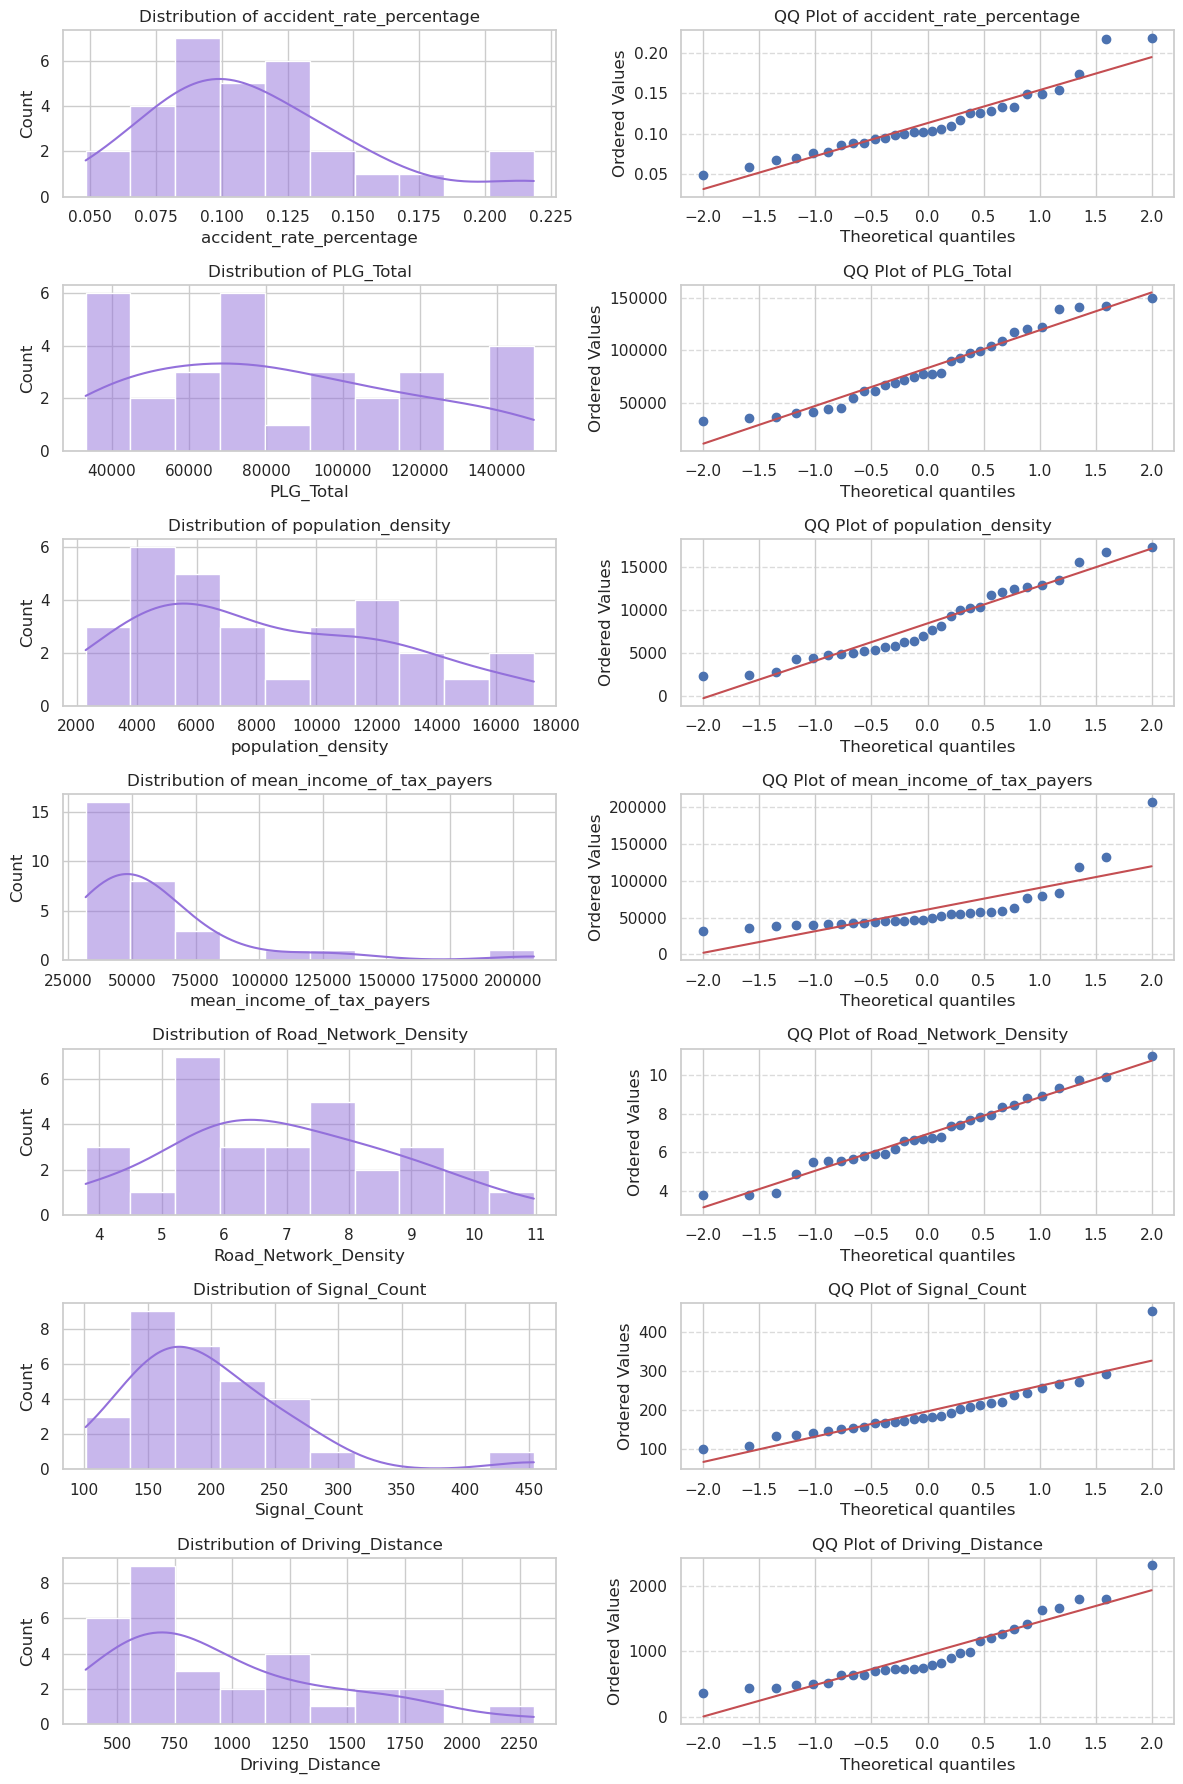

In [16]:
# 设置图形风格
sns.set(style="whitegrid")

# 设置图的大小
plt.figure(figsize=(12, 18))  # 增大高度以便显示所有7个变量

# 绘制各个变量的直方图和QQ图
variables = ['accident_rate_percentage', 'PLG_Total', 'population_density', 
             'mean_income_of_tax_payers', 'Road_Network_Density', 'Signal_Count', 'Driving_Distance']

# 循环绘制直方图和QQ图
for i, var in enumerate(variables, 1):
    plt.subplot(7, 2, 2*i - 1)  # 绘制每个变量的直方图
    sns.histplot(df_unique[var].dropna(), kde=True, bins=10, color="mediumpurple")
    plt.title(f'Distribution of {var}')
    
    plt.subplot(7, 2, 2*i)  # 绘制每个变量的QQ图
    stats.probplot(df_unique[var].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {var}')
        
    # 设置背景透明
    ax = plt.gca()
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_facecolor("none")  # 设置单个轴背景为透明

# 调整整个画布的背景为透明
fig = plt.gcf()  # 获取当前图形对象
fig.patch.set_alpha(0)  # 设置透明背景

# 调整布局
plt.tight_layout()
plt.show()

In [17]:
import scipy.stats as stats

# 列出需要检验的变量
variables = ['accident_rate_percentage', 'PLG_Total', 'population_density', 
             'mean_income_of_tax_payers', 'Road_Network_Density', 'Signal_Count', 'Driving_Distance']

# 对每个变量进行Shapiro-Wilk检验
for var in variables:
    # 对数据进行Shapiro-Wilk检验
    stat, p_value = stats.shapiro(df_unique[var].dropna())
    
    # 打印检验结果
    print(f"{var} - Shapiro-Wilk检验统计量: {stat:.4f}, p值: {p_value:.4f}")
    
    # 检查p值，判断是否符合正态分布
    if p_value > 0.05:
        print(f"{var} 数据符合正态分布 (不能拒绝原假设)\n")
    else:
        print(f"{var} 数据不符合正态分布 (拒绝原假设)\n")

accident_rate_percentage - Shapiro-Wilk检验统计量: 0.9242, p值: 0.0345
accident_rate_percentage 数据不符合正态分布 (拒绝原假设)

PLG_Total - Shapiro-Wilk检验统计量: 0.9449, p值: 0.1230
PLG_Total 数据符合正态分布 (不能拒绝原假设)

population_density - Shapiro-Wilk检验统计量: 0.9392, p值: 0.0868
population_density 数据符合正态分布 (不能拒绝原假设)

mean_income_of_tax_payers - Shapiro-Wilk检验统计量: 0.6444, p值: 0.0000
mean_income_of_tax_payers 数据不符合正态分布 (拒绝原假设)

Road_Network_Density - Shapiro-Wilk检验统计量: 0.9775, p值: 0.7555
Road_Network_Density 数据符合正态分布 (不能拒绝原假设)

Signal_Count - Shapiro-Wilk检验统计量: 0.8562, p值: 0.0008
Signal_Count 数据不符合正态分布 (拒绝原假设)

Driving_Distance - Shapiro-Wilk检验统计量: 0.8952, p值: 0.0064
Driving_Distance 数据不符合正态分布 (拒绝原假设)



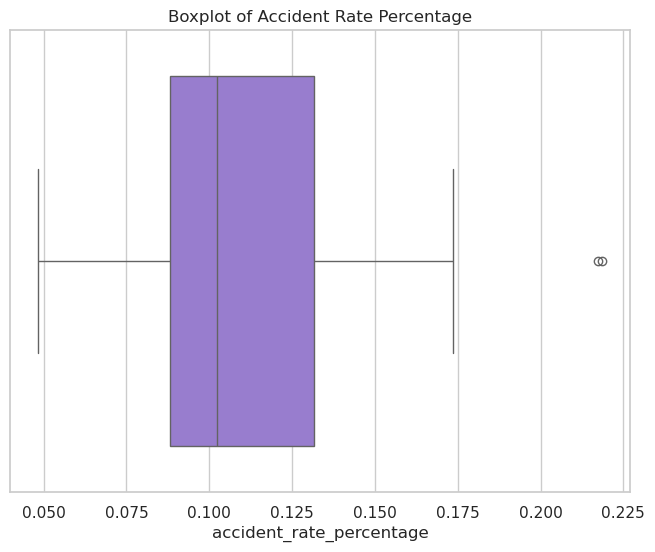

原始数据量: 30
去除因变量异常值后的数据量: 28


In [18]:
# 因变量 'accident_rate_percentage' 的箱型图
plt.figure(figsize=(8, 6))
sns.boxplot(x='accident_rate_percentage', data=df_unique, color="mediumpurple")
plt.title("Boxplot of Accident Rate Percentage")
plt.gca().set_facecolor("none")  # 子图背景透明
plt.gcf().patch.set_alpha(0)  # 整体背景透明
plt.show()

# 四分位距法则清理因变量的异常值
Q1 = df_unique['accident_rate_percentage'].quantile(0.25)
Q3 = df_unique['accident_rate_percentage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_unique[(df_unique['accident_rate_percentage'] >= lower_bound) & 
                        (df_unique['accident_rate_percentage'] <= upper_bound)]

print(f"原始数据量: {df_unique.shape[0]}")
print(f"去除因变量异常值后的数据量: {df_filtered.shape[0]}")

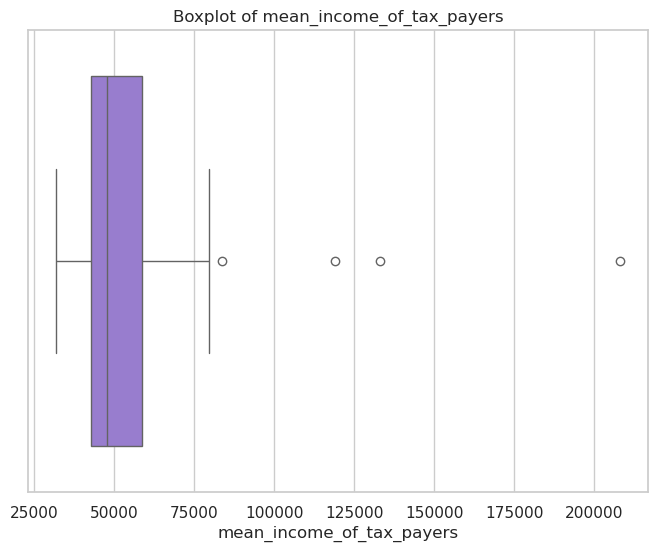

Lower Bound: 18650.0, Upper Bound: 82850.0
原始数据量: 30, 移除异常值后的数据量: 26


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制箱型图
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_unique['mean_income_of_tax_payers'],color="mediumpurple")
plt.title('Boxplot of mean_income_of_tax_payers')
plt.gca().set_facecolor("none")  # 子图背景透明
plt.gcf().patch.set_alpha(0)  # 整体背景透明
plt.show()

# 计算上下四分位数
Q1 = df_unique['mean_income_of_tax_payers'].quantile(0.25)
Q3 = df_unique['mean_income_of_tax_payers'].quantile(0.75)
IQR = Q3 - Q1  # 四分位距

# 计算上下限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# 移除异常值
df_filtered = df_unique[(df_unique['mean_income_of_tax_payers'] >= lower_bound) &
                        (df_unique['mean_income_of_tax_payers'] <= upper_bound)]

# 打印移除异常值后的数据量
print(f"原始数据量: {len(df_unique)}, 移除异常值后的数据量: {len(df_filtered)}")

In [20]:
df_unique = df_filtered

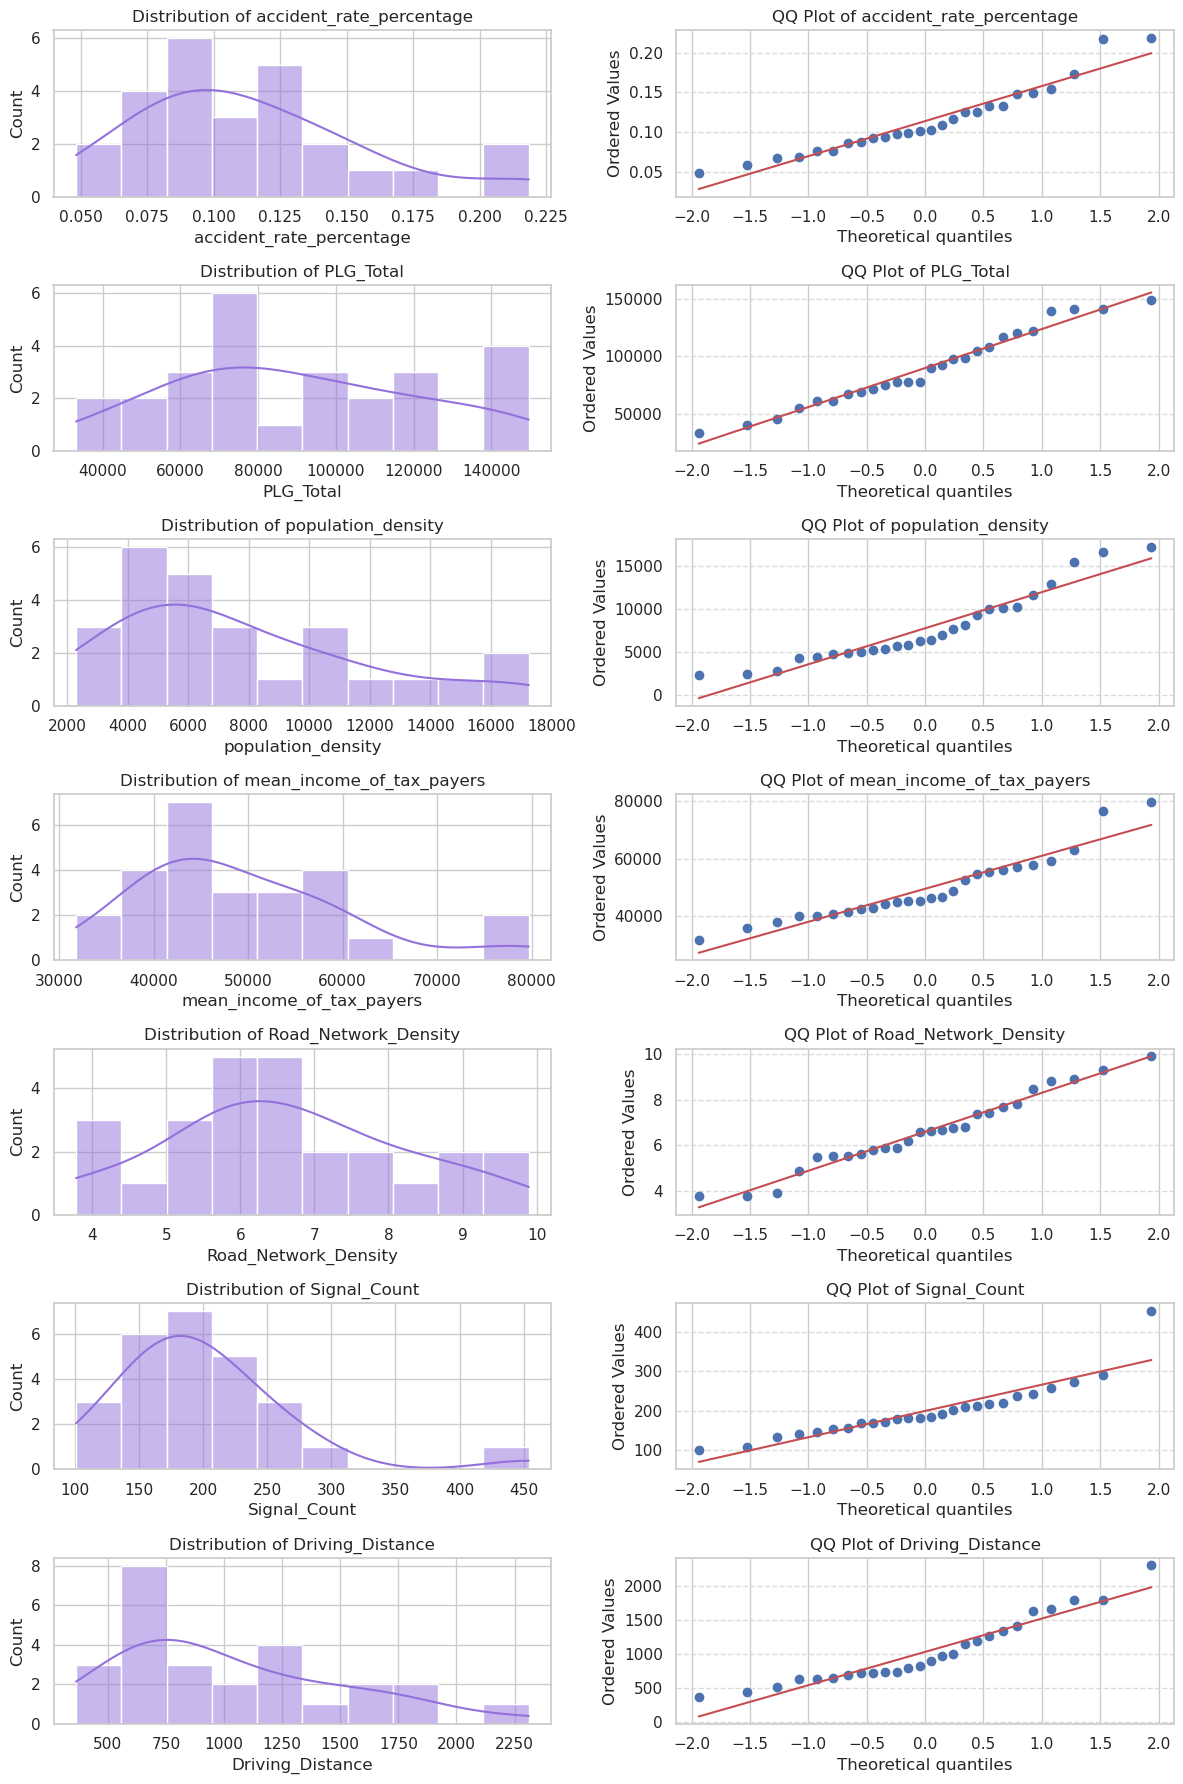

In [21]:
#设置图形风格
sns.set(style="whitegrid")

# 设置图的大小
plt.figure(figsize=(12, 18))  # 增大高度以便显示所有7个变量

# 绘制各个变量的直方图和QQ图
variables = ['accident_rate_percentage', 'PLG_Total', 'population_density', 
             'mean_income_of_tax_payers', 'Road_Network_Density', 'Signal_Count', 'Driving_Distance']

# 循环绘制直方图和QQ图
for i, var in enumerate(variables, 1):
    plt.subplot(7, 2, 2*i - 1)  # 绘制每个变量的直方图
    sns.histplot(df_unique[var].dropna(), kde=True, bins=10, color="mediumpurple")
    plt.title(f'Distribution of {var}')
    
    plt.subplot(7, 2, 2*i)  # 绘制每个变量的QQ图
    stats.probplot(df_unique[var].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {var}')
       
    # 设置背景透明
    ax = plt.gca()
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_facecolor("none")  # 设置单个轴背景为透明

# 调整整个画布的背景为透明
fig = plt.gcf()  # 获取当前图形对象
fig.patch.set_alpha(0)  # 设置透明背景

# 调整布局
plt.tight_layout()
plt.show()

In [22]:
import scipy.stats as stats

# 列出需要检验的变量
variables = ['accident_rate_percentage', 'PLG_Total', 'population_density', 
             'mean_income_of_tax_payers', 'Road_Network_Density', 'Signal_Count', 'Driving_Distance']

# 对每个变量进行Shapiro-Wilk检验
for var in variables:
    # 对数据进行Shapiro-Wilk检验
    stat, p_value = stats.shapiro(df_unique[var].dropna())
    
    # 打印检验结果
    print(f"{var} - Shapiro-Wilk检验统计量: {stat:.4f}, p值: {p_value:.4f}")
    
    # 检查p值，判断是否符合正态分布
    if p_value > 0.05:
        print(f"{var} 数据符合正态分布 (不能拒绝原假设)\n")
    else:
        print(f"{var} 数据不符合正态分布 (拒绝原假设)\n")

accident_rate_percentage - Shapiro-Wilk检验统计量: 0.9309, p值: 0.0813
accident_rate_percentage 数据符合正态分布 (不能拒绝原假设)

PLG_Total - Shapiro-Wilk检验统计量: 0.9650, p值: 0.4990
PLG_Total 数据符合正态分布 (不能拒绝原假设)

population_density - Shapiro-Wilk检验统计量: 0.9054, p值: 0.0207
population_density 数据不符合正态分布 (拒绝原假设)

mean_income_of_tax_payers - Shapiro-Wilk检验统计量: 0.9123, p值: 0.0297
mean_income_of_tax_payers 数据不符合正态分布 (拒绝原假设)

Road_Network_Density - Shapiro-Wilk检验统计量: 0.9692, p值: 0.6038
Road_Network_Density 数据符合正态分布 (不能拒绝原假设)

Signal_Count - Shapiro-Wilk检验统计量: 0.8526, p值: 0.0016
Signal_Count 数据不符合正态分布 (拒绝原假设)

Driving_Distance - Shapiro-Wilk检验统计量: 0.9169, p值: 0.0381
Driving_Distance 数据不符合正态分布 (拒绝原假设)



In [23]:
from scipy import stats

# 选择需要进行 Box-Cox 变换的变量
variables_to_transform = ['population_density', 
                          'mean_income_of_tax_payers',
                          'Signal_Count', 'Driving_Distance']

# 遍历每个变量并进行 Box-Cox 变换
for var in variables_to_transform:
    # 去除缺失值并检查正值
    data_cleaned = df_unique[var].dropna()
    
    if (data_cleaned <= 0).any():
        # 如果变量包含非正值，打印警告并跳过
        print(f"Warning: {var} contains non-positive values, skipping Box-Cox transformation.")
    else:
        # 对数据进行 Box-Cox 变换
        transformed_data, lambda_value = stats.boxcox(data_cleaned)
        
        # 使用原始数据的索引，将变换后的数据与原始数据合并
        df_unique.loc[data_cleaned.index, f'{var}_boxcox'] = transformed_data
        
        # 打印变换后的 Lambda 值和数据分布信息
        print(f"{var} 的最佳 Box-Cox λ值: {lambda_value}")

population_density 的最佳 Box-Cox λ值: 0.08076317704333721
mean_income_of_tax_payers 的最佳 Box-Cox λ值: -0.8605669393895539
Signal_Count 的最佳 Box-Cox λ值: -0.3593038183024873
Driving_Distance 的最佳 Box-Cox λ值: -0.056285838513443105


In [24]:
import scipy.stats as stats

# 列出需要检验的变量
variables = [ 'population_density_boxcox', 
             'mean_income_of_tax_payers_boxcox', 'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 对每个变量进行Shapiro-Wilk检验
for var in variables:
    # 对数据进行Shapiro-Wilk检验
    stat, p_value = stats.shapiro(df_unique[var].dropna())
    
    # 打印检验结果
    print(f"{var} - Shapiro-Wilk检验统计量: {stat:.4f}, p值: {p_value:.4f}")
    
    # 检查p值，判断是否符合正态分布
    if p_value > 0.05:
        print(f"{var} 数据符合正态分布 (不能拒绝原假设)\n")
    else:
        print(f"{var} 数据不符合正态分布 (拒绝原假设)\n")

population_density_boxcox - Shapiro-Wilk检验统计量: 0.9696, p值: 0.6143
population_density_boxcox 数据符合正态分布 (不能拒绝原假设)

mean_income_of_tax_payers_boxcox - Shapiro-Wilk检验统计量: 0.9827, p值: 0.9251
mean_income_of_tax_payers_boxcox 数据符合正态分布 (不能拒绝原假设)

Signal_Count_boxcox - Shapiro-Wilk检验统计量: 0.9815, p值: 0.9037
Signal_Count_boxcox 数据符合正态分布 (不能拒绝原假设)

Driving_Distance_boxcox - Shapiro-Wilk检验统计量: 0.9770, p值: 0.8049
Driving_Distance_boxcox 数据符合正态分布 (不能拒绝原假设)



In [25]:
df_unique.head()

,population_density,mean_income_of_tax_payers,Road_Network_Density,Signal_Count,Driving_Distance,PLG_Total,accident_rate_percentage,East,South,West,North,population_density_boxcox,mean_income_of_tax_payers_boxcox,Signal_Count_boxcox,Driving_Distance_boxcox
0,6286.4,31800.0,5.896200,454.0,634,67077.0,0.133072,1,0,0,0,12.711410,1.161870,2.474239,5.410316
442,4821.9,59100.0,5.486005,243.0,1666,139239.0,0.058325,0,0,0,1,12.179627,1.161934,2.396454,6.064294
1271,4295.6,38000.0,5.645334,169.0,995,108495.0,0.048344,1,0,0,0,11.951428,1.161892,2.342554,5.719820
1666,8112.3,44100.0,6.668517,181.0,970,92878.0,0.133144,0,0,1,0,13.233540,1.161908,2.353282,5.702553
2600,2299.4,54500.0,3.781264,257.0,1409,149589.0,0.094714,0,1,0,0,10.753747,1.161927,2.404159,5.953416


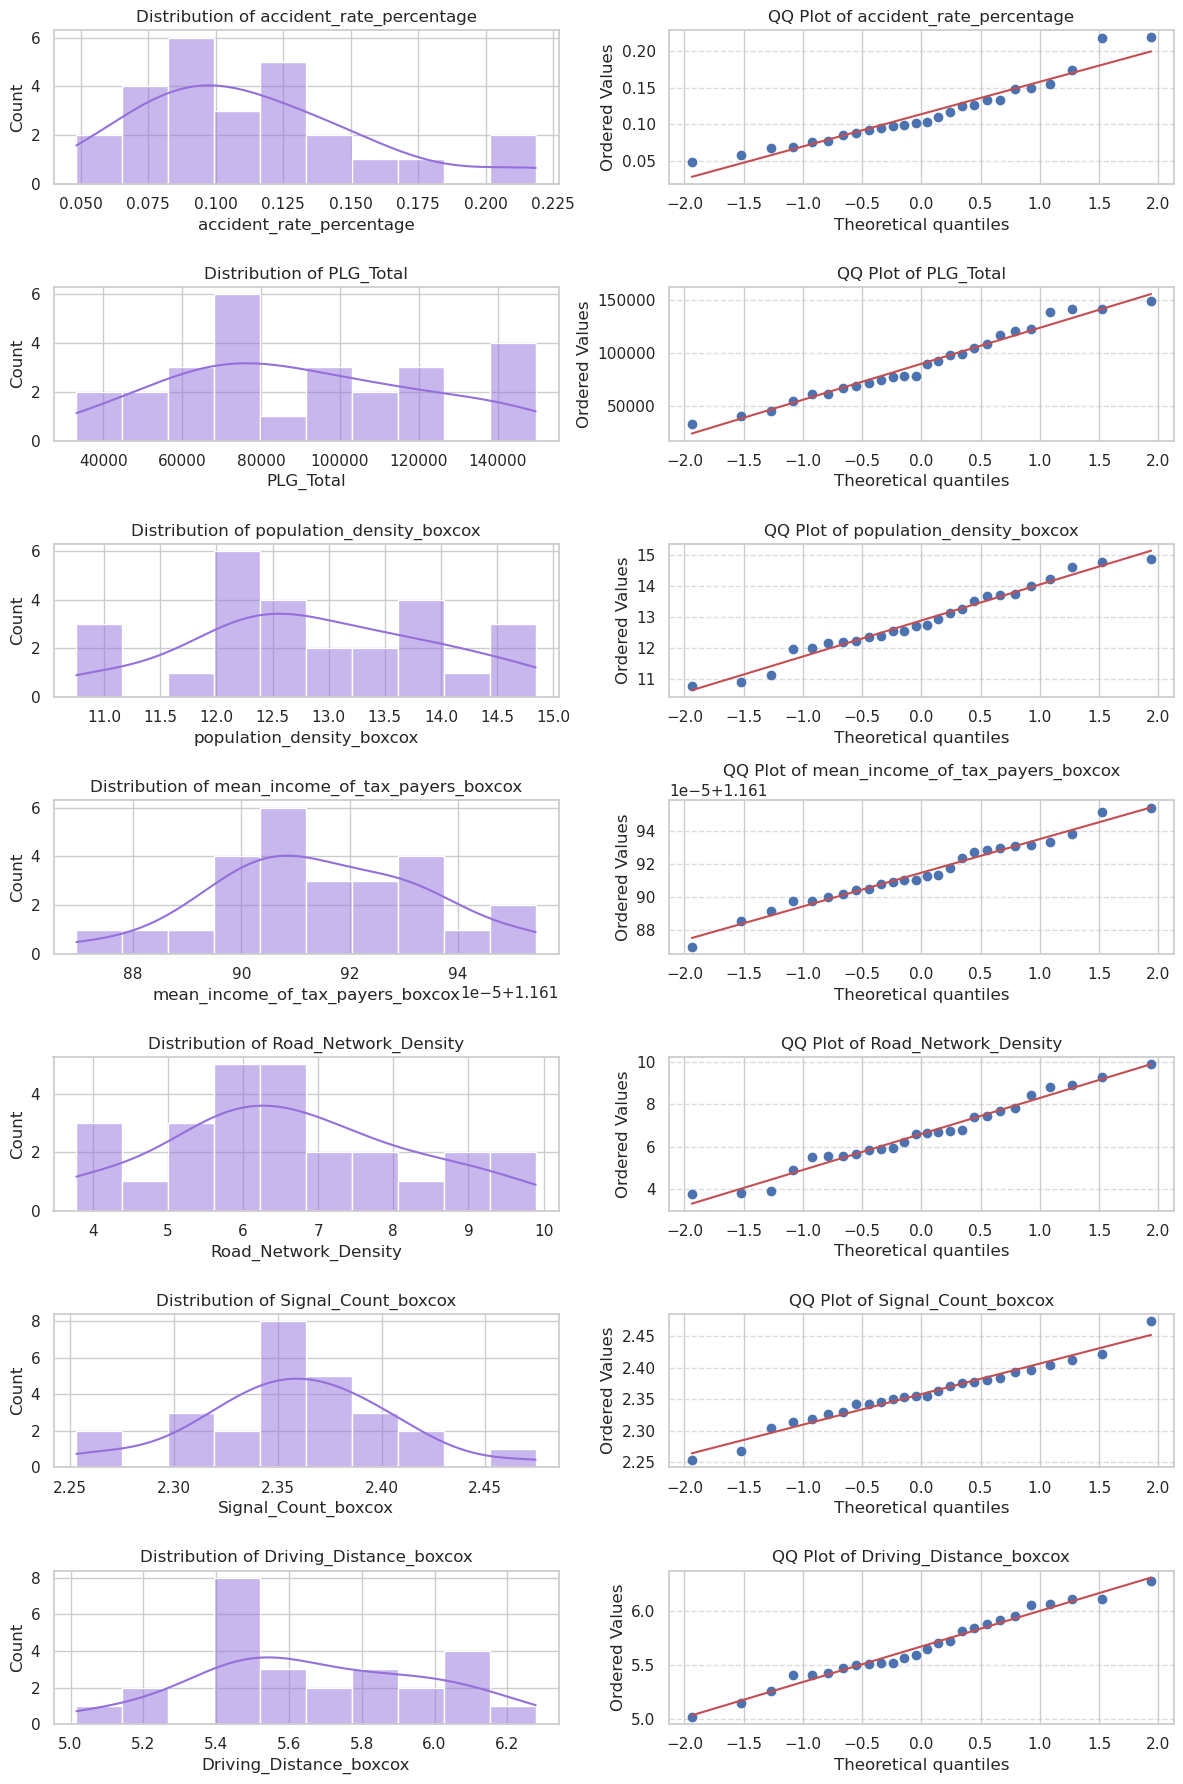

In [26]:
# 设置图形风格
sns.set(style="whitegrid")

# 设置图的大小
plt.figure(figsize=(12, 18))  # 增大高度以便显示所有7个变量

# 绘制各个变量的直方图和QQ图
variables = ['accident_rate_percentage', 'PLG_Total', 'population_density_boxcox', 
             'mean_income_of_tax_payers_boxcox', 'Road_Network_Density', 'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 循环绘制直方图和QQ图
for i, var in enumerate(variables, 1):
    plt.subplot(7, 2, 2*i - 1)  # 绘制每个变量的直方图
    sns.histplot(df_unique[var].dropna(), kde=True, bins=10, color="mediumpurple")
    plt.title(f'Distribution of {var}')
    
    plt.subplot(7, 2, 2*i)  # 绘制每个变量的QQ图
    stats.probplot(df_unique[var].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {var}')
        
    # 设置背景透明
    ax = plt.gca()
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_facecolor("none")  # 设置单个轴背景为透明

# 调整整个画布的背景为透明
fig = plt.gcf()  # 获取当前图形对象
fig.patch.set_alpha(0)  # 设置透明背景

# 调整布局
plt.tight_layout()
plt.show()

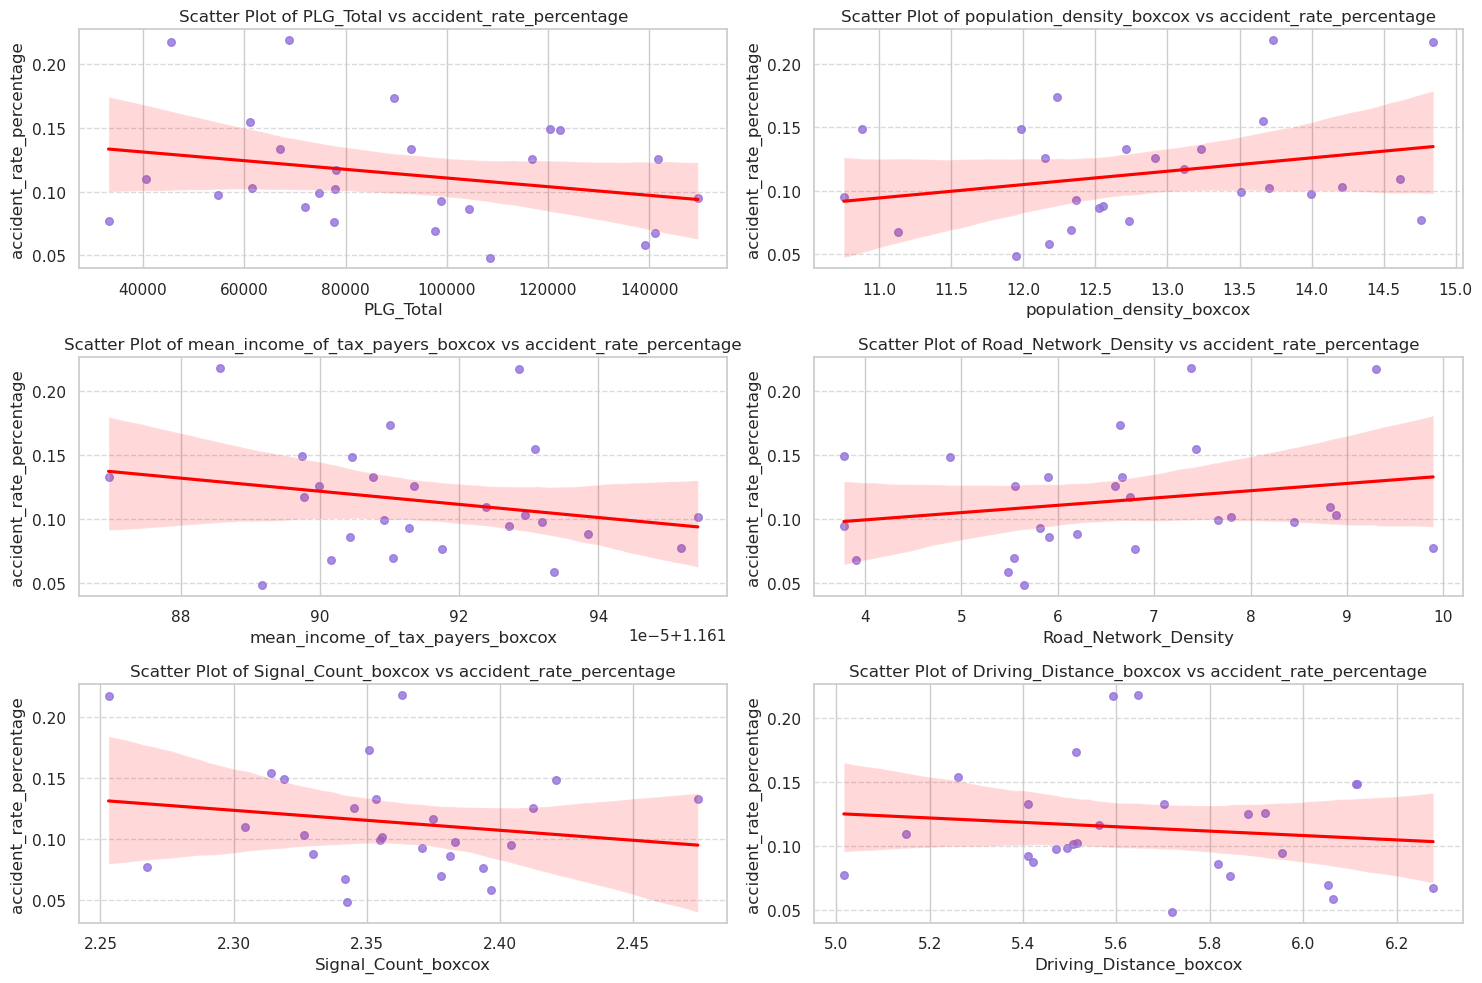

In [27]:
# 设置图形风格
sns.set(style="whitegrid")

# 创建一个大的图形，以便绘制多个子图
plt.figure(figsize=(15, 10))

# 自变量列表
variables = ['PLG_Total', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
             'Road_Network_Density', 'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 循环绘制每个自变量与因变量的散点图和拟合线
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)  # 2行3列布局
    sns.regplot(x=var, y='accident_rate_percentage', data=df_unique, scatter_kws={'s': 30, 'color': 'mediumpurple'}, line_kws={"color": "red"})
    plt.title(f'Scatter Plot of {var} vs accident_rate_percentage')
        
    # 设置背景透明
    ax = plt.gca()
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_facecolor("none")  # 设置单个轴背景为透明

# 调整整个画布的背景为透明
fig = plt.gcf()  # 获取当前图形对象
fig.patch.set_alpha(0)  # 设置透明背景

# 调整布局
plt.tight_layout()
plt.show()

In [28]:
df = df_unique[['accident_rate_percentage','PLG_Total', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
             'Road_Network_Density', 'Signal_Count_boxcox', 'Driving_Distance_boxcox', 'East', 'South', 'West', 'North'] ]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 20610
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   accident_rate_percentage          26 non-null     float64
 1   PLG_Total                         26 non-null     float64
 2   population_density_boxcox         26 non-null     float64
 3   mean_income_of_tax_payers_boxcox  26 non-null     float64
 4   Road_Network_Density              26 non-null     float64
 5   Signal_Count_boxcox               26 non-null     float64
 6   Driving_Distance_boxcox           26 non-null     float64
 7   East                              26 non-null     int64  
 8   South                             26 non-null     int64  
 9   West                              26 non-null     int64  
 10  North                             26 non-null     int64  
dtypes: float64(7), int64(4)
memory usage: 3.5 KB


In [29]:
df.head()

,accident_rate_percentage,PLG_Total,population_density_boxcox,mean_income_of_tax_payers_boxcox,Road_Network_Density,Signal_Count_boxcox,Driving_Distance_boxcox,East,South,West,North
0,0.133072,67077.0,12.711410,1.161870,5.896200,2.474239,5.410316,1,0,0,0
442,0.058325,139239.0,12.179627,1.161934,5.486005,2.396454,6.064294,0,0,0,1
1271,0.048344,108495.0,11.951428,1.161892,5.645334,2.342554,5.719820,1,0,0,0
1666,0.133144,92878.0,13.233540,1.161908,6.668517,2.353282,5.702553,0,0,1,0
2600,0.094714,149589.0,10.753747,1.161927,3.781264,2.404159,5.953416,0,1,0,0


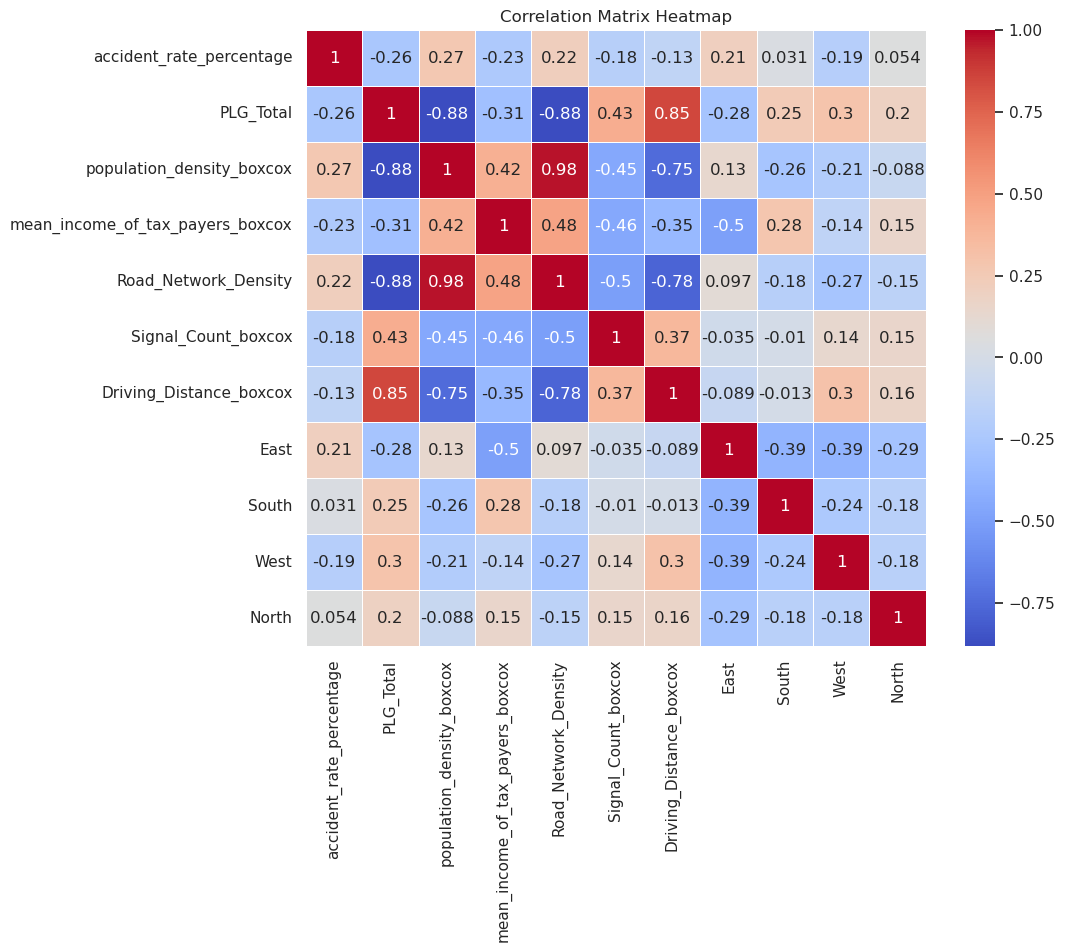

In [30]:
correlation_matrix = df.corr()
# 绘制相关性矩阵的热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
# 调整整个画布的背景为透明
fig = plt.gcf()  # 获取当前图形对象
fig.patch.set_alpha(0)  # 设置透明背景
plt.show()

In [31]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 选择需要计算VIF的自变量（去掉因变量 accident_rate_percentage）
variables = ['PLG_Total', 'population_density_boxcox', 
             'mean_income_of_tax_payers_boxcox', 'Road_Network_Density', 
             'Signal_Count_boxcox', 'Driving_Distance_boxcox', 'East', 'South', 'West', 'North']

# 从df中选择自变量数据
X = df[variables]

# 为计算VIF添加常数列（截距项）
X_with_const = add_constant(X)

# 计算VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# 打印VIF结果
print(vif_data)

                            Variable           VIF
0                              const  1.050956e+10
1                          PLG_Total  9.395344e+00
2          population_density_boxcox  4.154986e+01
3   mean_income_of_tax_payers_boxcox  2.945056e+00
4               Road_Network_Density  4.970962e+01
5                Signal_Count_boxcox  1.593547e+00
6            Driving_Distance_boxcox  4.624991e+00
7                               East  4.976892e+00
8                              South  3.668000e+00
9                               West  4.415902e+00
10                             North  3.481324e+00


In [32]:
import statsmodels.api as sm

# 准备因变量和自变量
y = df['accident_rate_percentage']
X = df[['PLG_Total', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
        'Road_Network_Density', 'Signal_Count_boxcox', 'Driving_Distance_boxcox', 'East', 'South', 'West', 'North']]
# 在模型中加入常数项
X = sm.add_constant(X)

# 1. 当前模型的R-squared
model_full = sm.OLS(y, X).fit()
r_squared_full = model_full.rsquared
print(f"当前模型的R-squared: {r_squared_full}")

# 2. 去除 'population_density_boxcox' 后的模型
X_no_population_density = X.drop(columns=['population_density_boxcox'])
model_no_population_density = sm.OLS(y, X_no_population_density).fit()
r_squared_no_population_density = model_no_population_density.rsquared
print(f"去除 'population_density_boxcox' 后的R-squared: {r_squared_no_population_density}")

# 3. 去除 'Road_Network_Density_boxcox' 后的模型
X_no_road_network_density = X.drop(columns=['Road_Network_Density'])
model_no_road_network_density = sm.OLS(y, X_no_road_network_density).fit()
r_squared_no_road_network_density = model_no_road_network_density.rsquared
print(f"去除 'Road_Network_Density' 后的R-squared: {r_squared_no_road_network_density}")

当前模型的R-squared: 0.5517771614478475
去除 'population_density_boxcox' 后的R-squared: 0.5391735503760179
去除 'Road_Network_Density' 后的R-squared: 0.5515210743166065


In [33]:
df_dropped = df.drop(columns=['Road_Network_Density'])

In [34]:
# 选择需要计算VIF的自变量（去掉因变量 accident_rate_percentage）
variables = ['PLG_Total', 'population_density_boxcox', 
             'mean_income_of_tax_payers_boxcox', 
             'Signal_Count_boxcox', 'Driving_Distance_boxcox', 'East', 'South', 'West', 'North']

# 从df中选择自变量数据
X = df[variables]

# 为计算VIF添加常数列（截距项）
X_with_const = add_constant(X)

# 计算VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# 打印VIF结果
print(vif_data)

                           Variable           VIF
0                             const  9.830558e+09
1                         PLG_Total  9.390588e+00
2         population_density_boxcox  5.455447e+00
3  mean_income_of_tax_payers_boxcox  2.755016e+00
4               Signal_Count_boxcox  1.544830e+00
5           Driving_Distance_boxcox  4.485358e+00
6                              East  4.158984e+00
7                             South  3.261059e+00
8                              West  3.161298e+00
9                             North  2.322743e+00


In [35]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 20610
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   accident_rate_percentage          26 non-null     float64
 1   PLG_Total                         26 non-null     float64
 2   population_density_boxcox         26 non-null     float64
 3   mean_income_of_tax_payers_boxcox  26 non-null     float64
 4   Signal_Count_boxcox               26 non-null     float64
 5   Driving_Distance_boxcox           26 non-null     float64
 6   East                              26 non-null     int64  
 7   South                             26 non-null     int64  
 8   West                              26 non-null     int64  
 9   North                             26 non-null     int64  
dtypes: float64(6), int64(4)
memory usage: 3.3 KB


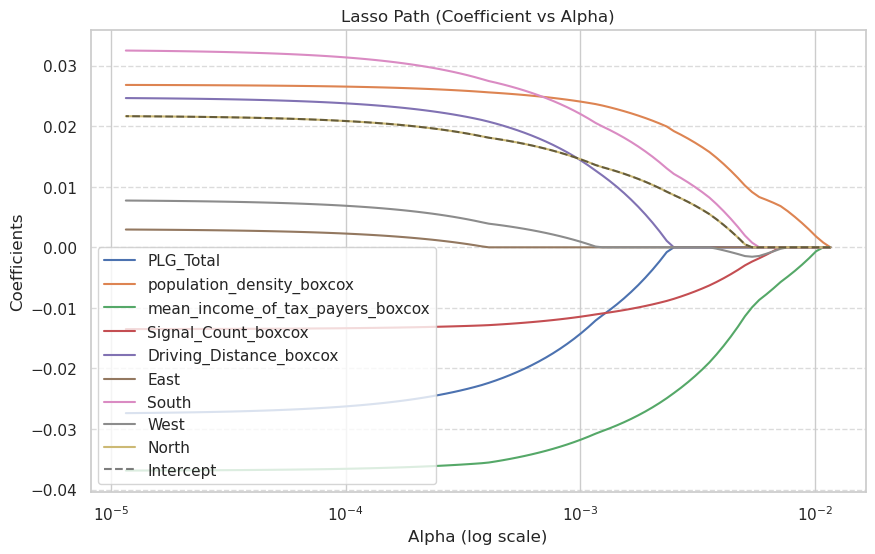

最佳alpha: 0.0004364116464306532
系数: [-0.02199218  0.02552968 -0.0353621  -0.01278197  0.02044969  0.
  0.02720302  0.00376381  0.01793315]


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# 1. 准备数据
X = df_dropped.drop(columns=['accident_rate_percentage'])
y = df_dropped['accident_rate_percentage']

# 2. 标准化自变量
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 使用LassoCV来计算不同alpha值下的路径
lasso = LassoCV(cv=5, max_iter=10000)
lasso.fit(X_scaled, y)

# 获取路径
alphas_lasso, coefs_lasso, _ = lasso.path(X_scaled, y)

# 4. 绘制Lasso路径图
plt.figure(figsize=(10, 6))
ax = plt.gca()

# 绘制每个变量的系数路径
for i in range(X.shape[1]):
    ax.plot(alphas_lasso, coefs_lasso[i, :], label=X.columns[i])

ax.plot(alphas_lasso, coefs_lasso[-1, :], label="Intercept", linestyle="--", color="black", alpha = 0.5)

# 设置图形
ax.set_xscale('log')  # x轴是log尺度
ax.set_xlabel("Alpha (log scale)")
ax.set_ylabel("Coefficients")
ax.set_title("Lasso Path (Coefficient vs Alpha)")

# 设置背景透明
ax = plt.gca()
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_facecolor("none")  # 设置单个轴背景为透明

# 调整整个画布的背景为透明
fig = plt.gcf()  # 获取当前图形对象
fig.patch.set_alpha(0)  # 设置透明背景

# 添加图例
plt.legend()
plt.axis('tight')
plt.show()


# 5. 输出Lasso回归的最佳alpha和系数
print(f"最佳alpha: {lasso.alpha_}")
print(f"系数: {lasso.coef_}")

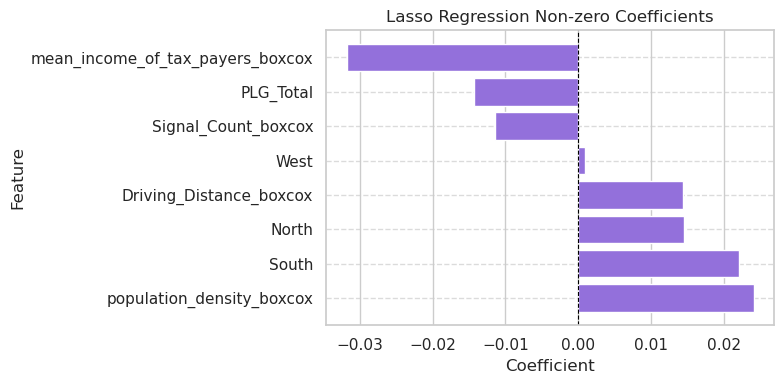

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# 准备数据
X = df_dropped[['PLG_Total', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
        'Signal_Count_boxcox', 'Driving_Distance_boxcox', 'East', 'South', 'West', 'North']]
y = df_dropped['accident_rate_percentage']

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso回归
lasso = Lasso(alpha=0.001)  # 调整 alpha 以获得合适的正则化力度
lasso.fit(X_scaled, y)

# 获取非零系数及变量名称
coef = lasso.coef_
features = X.columns

# 创建系数表
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df = coef_df[coef_df['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

# 绘制条形图
plt.figure(figsize=(8,4))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='mediumpurple')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Lasso Regression Non-zero Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()

# 设置背景透明
ax = plt.gca()
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_facecolor("none")  # 设置单个轴背景为透明

# 调整整个画布的背景为透明
fig = plt.gcf()  # 获取当前图形对象
fig.patch.set_alpha(0)  # 设置透明背景
plt.show()

In [38]:
# 移除不显著变量（如 Signal_Count_boxcox）
X = df_dropped[['PLG_Total', 'Signal_Count_boxcox', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 'Driving_Distance_boxcox', 'East', 'South', 'North']]
y = df_dropped['accident_rate_percentage']

# 添加常数项
X = sm.add_constant(X)

# 重新训练模型
model = sm.OLS(y, X).fit()

# 输出模型摘要
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     accident_rate_percentage   R-squared:                       0.541
Model:                                  OLS   Adj. R-squared:                  0.325
Method:                       Least Squares   F-statistic:                     2.504
Date:                      Mon, 09 Dec 2024   Prob (F-statistic):             0.0532
Time:                              18:04:02   Log-Likelihood:                 55.161
No. Observations:                        26   AIC:                            -92.32
Df Residuals:                            17   BIC:                            -81.00
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

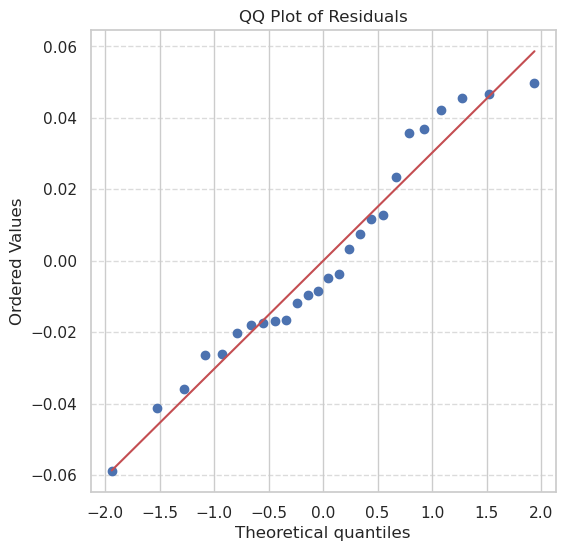

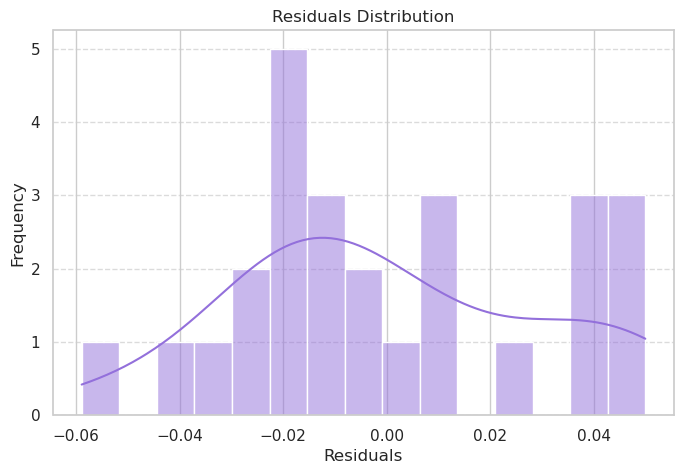

Shapiro-Wilk 检验统计量: 0.9525841732119102, p值: 0.2663588912506694
残差符合正态分布（不能拒绝原假设）


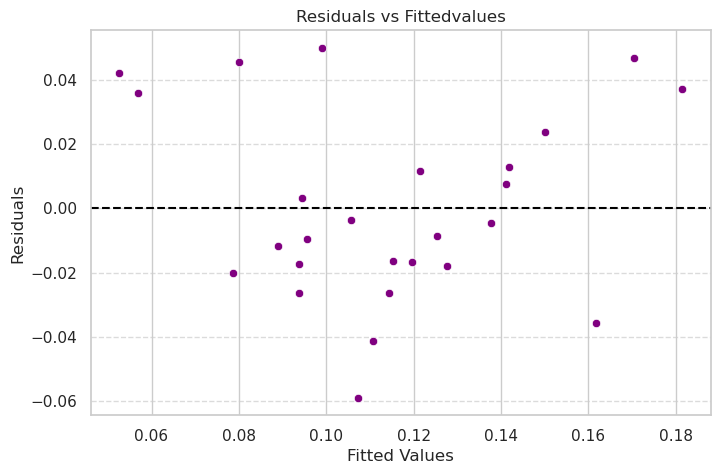

In [40]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 提取残差
residuals = model.resid

# 绘制 QQ 图
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)  # QQ 图
plt.title("QQ Plot of Residuals")
# 设置背景透明
ax = plt.gca()
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_facecolor("none")  # 设置单个轴背景为透明

# 调整整个画布的背景为透明
fig = plt.gcf()  # 获取当前图形对象
fig.patch.set_alpha(0)  # 设置透明背景
plt.show()

# 绘制残差的分布直方图
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=15, color="mediumpurple")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# 设置背景透明
ax = plt.gca()
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_facecolor("none")  # 设置单个轴背景为透明

# 调整整个画布的背景为透明
fig = plt.gcf()  # 获取当前图形对象
fig.patch.set_alpha(0)  # 设置透明背景
plt.show()

# 使用 Shapiro-Wilk 检验残差的正态性
stat, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk 检验统计量: {stat}, p值: {p_value}")
if p_value > 0.05:
    print("残差符合正态分布（不能拒绝原假设）")
else:
    print("残差不符合正态分布（拒绝原假设）")

# 残差与预测值的散点图（检查均方性）
Fittedvalues = model.fittedvalues
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Fittedvalues, y=residuals, color="purple")
plt.axhline(y=0, color="black", linestyle="--")
plt.title("Residuals vs Fittedvalues")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
# 设置背景透明
ax = plt.gca()
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_facecolor("none")  # 设置单个轴背景为透明

# 调整整个画布的背景为透明
fig = plt.gcf()  # 获取当前图形对象
fig.patch.set_alpha(0)  # 设置透明背景
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# 生成一些示例数据
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# 使用 Lasso 回归模型
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# 绘制 Lasso 路径
alphas_lasso, coefs_lasso, _ = lasso.path(X, y, eps=5e-3)

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制每个回归系数的路径
for i in range(coefs_lasso.shape[0]):
    plt.plot(np.log10(alphas_lasso), coefs_lasso[i], label=f"Feature {i+1}")

# 添加图例并调整其位置
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# 设置图表标题和标签
plt.title('Lasso Path (Coefficient vs Alpha)')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficients')

# 显示图表
plt.tight_layout()
plt.show()


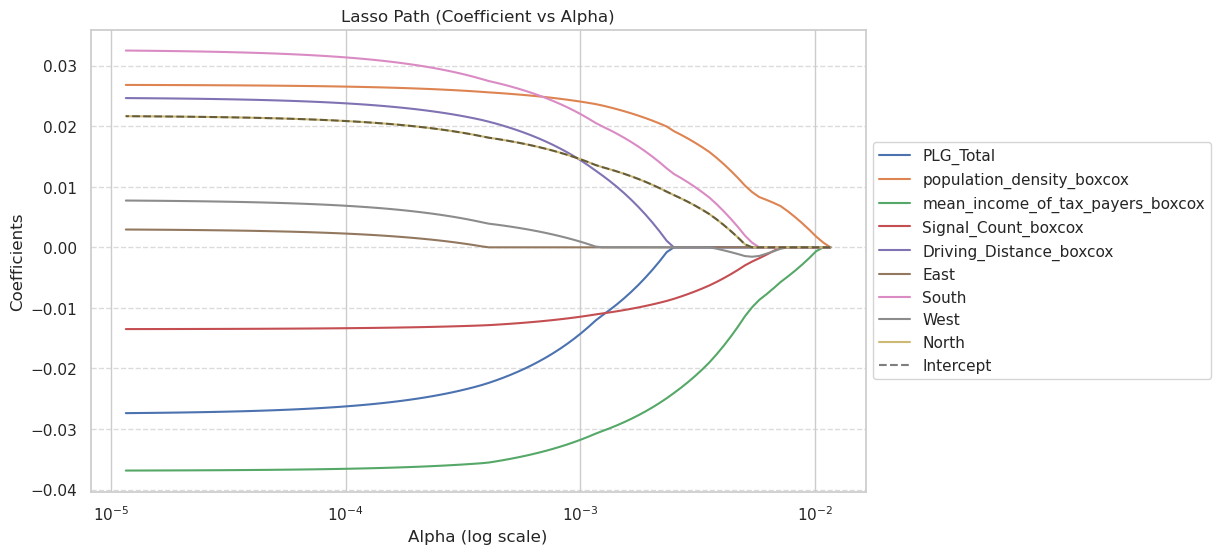

最佳alpha: 0.0004364116464306532
系数: [-0.02199218  0.02552968 -0.0353621  -0.01278197  0.02044969  0.
  0.02720302  0.00376381  0.01793315]


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# 1. 准备数据
X = df_dropped.drop(columns=['accident_rate_percentage'])
y = df_dropped['accident_rate_percentage']

# 2. 标准化自变量
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 使用LassoCV来计算不同alpha值下的路径
lasso = LassoCV(cv=5, max_iter=10000)
lasso.fit(X_scaled, y)

# 获取路径
alphas_lasso, coefs_lasso, _ = lasso.path(X_scaled, y)

# 4. 绘制Lasso路径图
plt.figure(figsize=(10, 6))
ax = plt.gca()

# 绘制每个变量的系数路径
for i in range(X.shape[1]):
    ax.plot(alphas_lasso, coefs_lasso[i, :], label=X.columns[i])

ax.plot(alphas_lasso, coefs_lasso[-1, :], label="Intercept", linestyle="--", color="black", alpha = 0.5)

# 设置图形
ax.set_xscale('log')  # x轴是log尺度
ax.set_xlabel("Alpha (log scale)")
ax.set_ylabel("Coefficients")
ax.set_title("Lasso Path (Coefficient vs Alpha)")

# 设置背景透明
ax = plt.gca()
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_facecolor("none")  # 设置单个轴背景为透明

# 调整整个画布的背景为透明
fig = plt.gcf()  # 获取当前图形对象
fig.patch.set_alpha(0)  # 设置透明背景

# 添加图例
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.axis('tight')
plt.show()


# 5. 输出Lasso回归的最佳alpha和系数
print(f"最佳alpha: {lasso.alpha_}")
print(f"系数: {lasso.coef_}")

In [43]:
plt.savefig("lasso_path_plot.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [44]:
# 保存图像
plt.savefig("lasso_path_plot.png", dpi=300, bbox_inches='tight', transparent=True)

<Figure size 640x480 with 0 Axes>